<a href="https://colab.research.google.com/github/Anandoptimus/Anandoptimus.github.io/blob/main/Cassava_leaf_disease_identification_in_machine_learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cassava leaf disease identification in machine learing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [3]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip = True, preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
train = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/Cassava plant project/Cassava plant leaf disease project/New plant disease/new_plant_disease/train',
                                          target_size= (256, 256),
                                          batch_size=32)

val = val_datagen.flow_from_directory(directory = '/content/drive/MyDrive/Cassava plant project/Cassava plant leaf disease project/New plant disease/new_plant_disease/valid',
                                          target_size= (256, 256),
                                          batch_size=32)

Found 10295 images belonging to 5 classes.
Found 2003 images belonging to 5 classes.


In [ ]:
t_img , label = train.next()

In [ ]:
label.shape

(32, 5)

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr, label):

  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    # plt.imshow(im) it shows with negative color
    plt.imshow(im/255)
    plt.show()

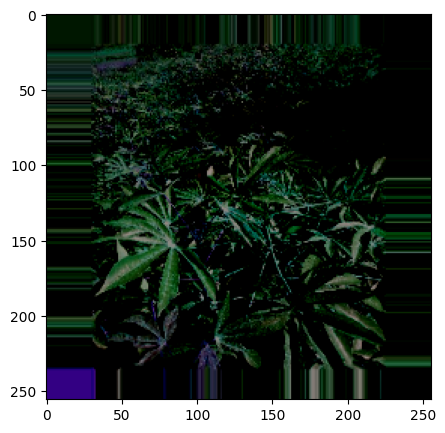

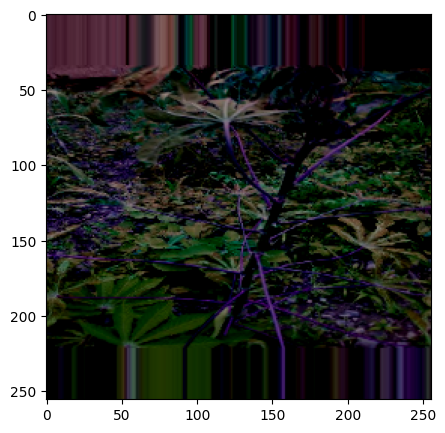

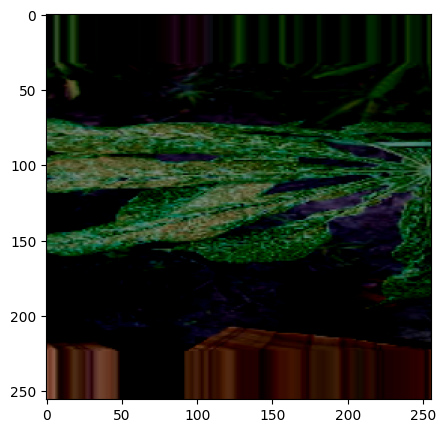

In [ ]:
plotImage(t_img[:3], label[:3])

# Building our Model


In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top =False)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units= 5, activation='softmax')(X) # input from the first line X

#Creating our model
model = Model(base_model.input, X)

In [ ]:
model.summary() #model trained

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy ,
              metrics=['accuracy'])

# Early Stopping and Model Check point


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta=0.01, patience= 3, verbose=1)

# model check point
mc = ModelCheckpoint(filepath="best_model.h5",
                     monitor= 'val_accuracy',
                     min_delta=0.01,
                     patience= 3,
                     verbose=1,
                     save_best_only= True)

cb = [es, mc]

In [ ]:
es

In [ ]:
mc


In [ ]:
train

In [ ]:
his = model.fit_generator(train,
                          steps_per_epoch= 16,
                          epochs=50,
                          verbose= 1,
                          callbacks=cb,
                          validation_data= val,
                          validation_steps= 16 )
#  his = model.fit_generator(train,
# Epoch 1/50
# 16/16 [==============================] - ETA: 0s - loss: 17.6964 - accuracy: 0.3499
# Epoch 1: val_accuracy improved from -inf to 0.29297, saving model to best_model.h5
# 16/16 [==============================] - 576s 37s/step - loss: 17.6964 - accuracy: 0.3499 - val_loss: 18.8014 - val_accuracy: 0.2930
# /usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
#   saving_api.save_model(
# Epoch 2/50
# 16/16 [==============================] - ETA: 0s - loss: 11.8904 - accuracy: 0.4531
# Epoch 2: val_accuracy improved from 0.29297 to 0.43750, saving model to best_model.h5
# 16/16 [==============================] - 522s 34s/step - loss: 11.8904 - accuracy: 0.4531 - val_loss: 13.5863 - val_accuracy: 0.4375
# Epoch 3/50
# 16/16 [==============================] - ETA: 0s - loss: 10.6050 - accuracy: 0.4551
# Epoch 3: val_accuracy improved from 0.43750 to 0.44531, saving model to best_model.h5
# 16/16 [==============================] - 454s 29s/step - loss: 10.6050 - accuracy: 0.4551 - val_loss: 14.9435 - val_accuracy: 0.4453
# Epoch 4/50
# 16/16 [==============================] - ETA: 0s - loss: 11.3675 - accuracy: 0.5078
# Epoch 4: val_accuracy did not improve from 0.44531
# 16/16 [==============================] - 375s 24s/step - loss: 11.3675 - accuracy: 0.5078 - val_loss: 25.0542 - val_accuracy: 0.3242
# Epoch 5/50
# 16/16 [==============================] - ETA: 0s - loss: 12.7903 - accuracy: 0.4902
# Epoch 5: val_accuracy did not improve from 0.44531
# 16/16 [==============================] - 307s 20s/step - loss: 12.7903 - accuracy: 0.4902 - val_loss: 18.4760 - val_accuracy: 0.4102
# Epoch 5: early stopping

<ipython-input-22-a05dde502057>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 17.6964 - accuracy: 0.3499 
Epoch 1: val_accuracy improved from -inf to 0.29297, saving model to best_model.h5
16/16 [==============================] - 576s 37s/step - loss: 17.6964 - accuracy: 0.3499 - val_loss: 18.8014 - val_accuracy: 0.2930


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 11.8904 - accuracy: 0.4531 
Epoch 2: val_accuracy improved from 0.29297 to 0.43750, saving model to best_model.h5
16/16 [==============================] - 522s 34s/step - loss: 11.8904 - accuracy: 0.4531 - val_loss: 13.5863 - val_accuracy: 0.4375
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 10.6050 - accuracy: 0.4551 
Epoch 3: val_accuracy improved from 0.43750 to 0.44531, saving model to best_model.h5
16/16 [==============================] - 454s 29s/step - loss: 10.6050 - accuracy: 0.4551 - val_loss: 14.9435 - val_accuracy: 0.4453
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 11.3675 - accuracy: 0.5078 
Epoch 4: val_accuracy did not improve from 0.44531
16/16 [==============================] - 375s 24s/step - loss: 11.3675 - accuracy: 0.5078 - val_loss: 25.0542 - val_accuracy: 0.3242
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 12.7903 - accuracy: 0.

In [ ]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

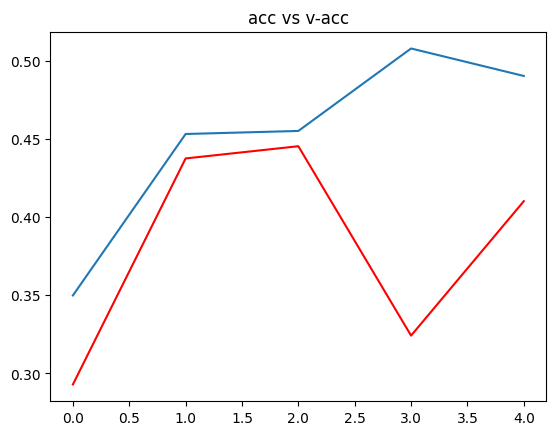

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c= 'red')
plt.title('acc vs v-acc')  #accuracy vs validate- accuracy
plt.show()

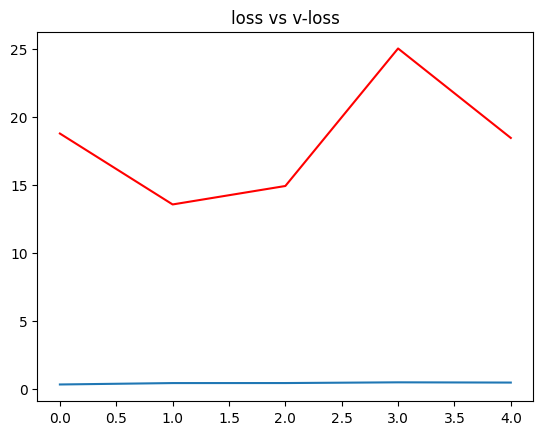

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_loss'] , c= 'red')
plt.title('loss vs v-loss')
plt.show()

In [8]:
# load best model

from keras.models import load_model

model = load_model('/content/drive/MyDrive/Cassava plant project/Cassava plant leaf disease project/model/best_model.h5') # bro remember this file is not there if error occur create this file

In [10]:
acc = model.evaluate_generator(val)[1]

print(f"The accuracy of model is = {acc*100} %")

# <ipython-input-27-b143ccf2002f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
#   acc = model.evaluate_generator(val)[1]
# The accuracy of model is = 45.23215293884277 %

<ipython-input-10-88a55e5c0dbc>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of model is = 45.23215293884277 %


In [12]:
ref = dict(zip(list(train.class_indices.values()) , list(train.class_indices.keys())))
 # it will show the dict of 5 classes after .key it will show the list
 # it will show like this
 #{0:cbb ... 5:healthy}

In [13]:
def prediction(path):
  img = load_img(path, target_size= (256,256))
  i=img_to_array(img)
  im = preprocess_input(i)  #output be (256, 256, 3)
  img = np.expand_dims(im, axis=0)   #output be (1, 256, 256, 3)
  # print(img.shape)
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to {ref[pred]} ")

In [14]:
path = '/content/drive/MyDrive/Cassava plant project/Cassava plant leaf disease project/test/test/extra-image-611.jpg'

prediction(path)

1/1 [==============================] - 1s 1s/step
The image belongs to Cassava_mosaic_virus 


In [ ]:
# project over bro

Mounted at /content/drive
